MAJOR PROJECT : Movie Reccomendation System
---
------
A new era of information has been ushered in by the rapid expansion of data collection. Systems with higher levels of efficiency are being built using data, and recommendation systems play a part in this.  As they enhance the quality of search results and present items that are more pertinent to the search item or related to the user's search history, recommendation systems fall under the category of **information filtering systems**.  

There are basically three types of recommender systems:-

> *  **Demographic Filtering**- They provide each user with generic recommendations based on the popularity and/or genre of films. Users that share similar demographic characteristics are recommended the same films by the system. Since every user is unique, this method is seen excessively simplistic.

> *  **Content Based Filtering**- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

> *  **Collaborative Filtering**- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

In this kernel we'll be building a baseline **movie recommendation system** using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

Importing the necessary libraries

In [15]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate


Load the dataset

In [16]:
#Load the dataset
df1=pd.read_csv('/content/tmdb_5000_credits[1].csv')
df2=pd.read_csv('/content/tmdb_5000_movies[1].csv')

In [18]:
#Viewing the dataset
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [23]:
# Display the first few rows of the dataset
df1.head()

,id,tittle,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,tittle_x,cast_x,crew_x,tittle_y,cast_y,crew_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
# Display the shape of the dataset
df1.shape

(4803, 4)

In [25]:
df2.shape

(4803, 26)

In [28]:
# Display descriptive statistics of the DataFrame
df1.describe()

,id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [29]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [30]:
# Check for missing values in the dataset
df1.isnull().sum()

id        0
tittle    0
cast      0
crew      0
dtype: int64

In [31]:
df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle_x                   0
cast_x                     0
crew_x                     0
tittle_y                   0
cast_y                     0
crew_y                     0
dtype: int64

In [32]:
# Display information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4803 non-null   int64 
 1   tittle  4803 non-null   object
 2   cast    4803 non-null   object
 3   crew    4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [34]:
# Check if there are any missing values in the DataFrame
df1.isna().any()

id        False
tittle    False
cast      False
crew      False
dtype: bool

In [35]:
df2.isna().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
tittle_x                False
cast_x                  False
crew_x                  False
tittle_y                False
cast_y                  False
crew_y                  False
dtype: bool

In [36]:
# Display the columns present in the DataFrame
df1.columns

Index(['id', 'tittle', 'cast', 'crew'], dtype='object')

In [37]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle_x', 'cast_x', 'crew_x', 'tittle_y', 'cast_y',
       'crew_y'],
      dtype='object')

# **Demographic Filtering** -
   Before getting started with this  -
* We need a metric to score or rate movie
* Calculate the score for every movie
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)

where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as

In [38]:
C= df2['vote_average'].mean()
C

6.092171559442016

Thus, on a scale of 10 points, the average rating for all the films is roughly 6.

Finding a suitable figure for m—the minimum number of votes needed to be included in the chart—is the next step.

The 90th percentile will serve as our cutoff point. Put otherwise, a film needs to receive more votes than at least 90% of the other films on the list in order to be included in the charts.

In [39]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, to filter out the movies that qualify for the chart

In [40]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 26)

It is evident that 481 films meet the requirements to be included in this list. We now have to figure out our statistic for every eligible film.

To accomplish this, we will create a new feature called **score** and build a function called **weighted_rating()**. We will then apply this function to our DataFrame of qualified movies to determine the value of the new feature.


In [41]:
def weighted_rating(x, m=m, C=C):
    # Extracting the number of votes and average rating for the item
    v = x['vote_count']
    R = x['vote_average']

    # Weighted Rating Calculation (IMDB Formula)
    # Part 1: Weighted average rating based on the number of votes
    term1 = (v / (v + m)) * R

    # Part 2: Regularization term to avoid bias towards items with very few votes

    term2 = (m / (m + v)) * C
    # Combine the two terms to get the final weighted rating
    weighted_rating = term1 + term2

    return weighted_rating

In [43]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, sort the DataFrame by score and output the top ten movies' titles, vote counts, vote averages, and weighted ratings or scores.


In [45]:
# Sort movies based on the calculated score in descending order
q_movies = q_movies.sort_values('score', ascending=False)

# Display the top 10 movies with relevant information
top_movies_info = q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)
print("Top 10 Movies:")
print(top_movies_info)

Top 10 Movies:
                                              title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.

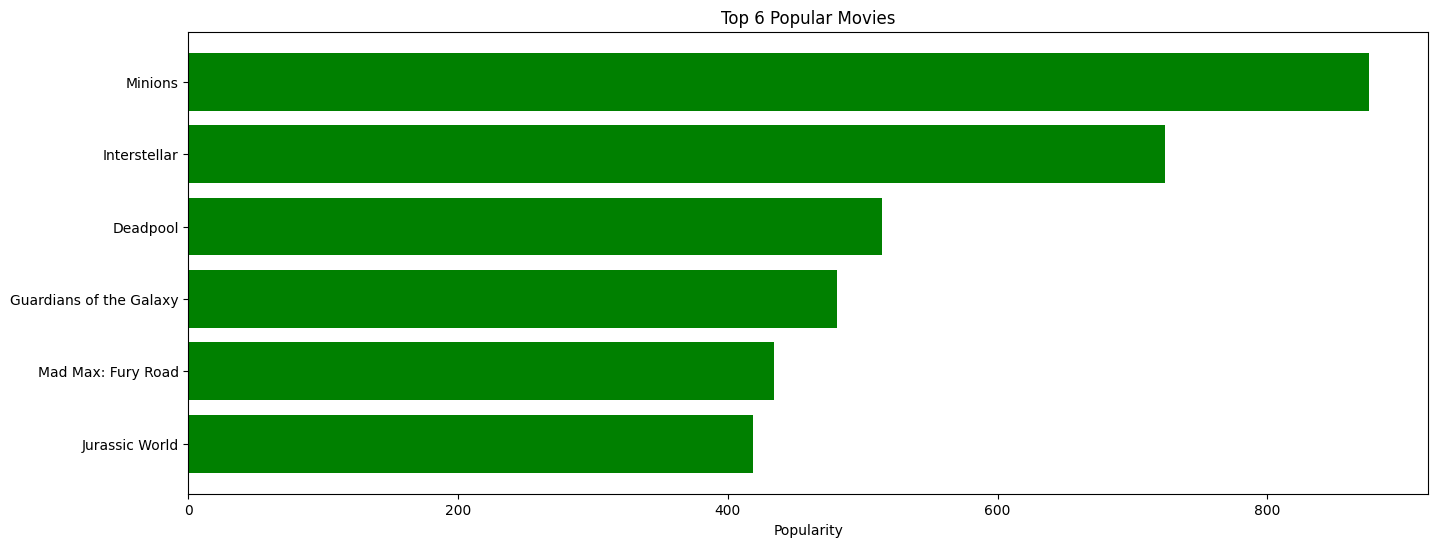

In [50]:
# Sort the DataFrame based on 'popularity' column in descending order
popularity_sorted = df2.sort_values('popularity', ascending=False)

# Set up the figure for the bar chart
plt.figure(figsize=(16, 6))

# Plot a horizontal bar chart for the top 6 popular movies
plt.barh(popularity_sorted['title'].head(6), popularity_sorted['popularity'].head(6), align='center', color='green')

# Invert the y-axis for better readability
plt.gca().invert_yaxis()

# Set labels and title for the chart
plt.xlabel("Popularity")
plt.title("Top 6 Popular Movies")

# Show the plot
plt.show()

Popularity-based films is shown in the above plot
---

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

## **Plot description based Recommender**

Based on the plot descriptions of each movie, we will calculate pairwise similarity ratings for each one and then suggest movies based on those similarity values.

The **overview** feature of our dataset provides a description of the plot.


In [52]:
# Display the overview of the first 5 movies
print(df2['overview'].head(5))

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object


Anyone who has done any text processing understands that we need to convert the word vectors of each overview.
We will now generate Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.


Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**


Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.

In [54]:
# Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. Remove all English stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

# Construct the TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# Display the shape of tfidf_matrix
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

TF-IDF Matrix Shape: (4803, 20978)


With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate.

Since we employed the TF-IDF vectorizer, calculating the dot product yields the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() because it is faster.


In [56]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [58]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [60]:
# Function to get movie recommendations based on similarity scores
def get_recommendations(title, cosine_similarity_matrix=cosine_sim):

    # Get the index of the movie that matches the input title
    movie_index = indices[title]
    # Get the cosine similarity scores for the specified movie
    similarity_scores = list(enumerate(cosine_similarity_matrix[movie_index]))
    # Sort the movies based on similarity scores in descending order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    # Extract the indices of the top 10 most similar movies
    top_movie_indices = [index for index, score in sorted_scores[1:11]]
    # Return the titles of the top 10 most similar movies
    top_movie_titles = df2['title'].iloc[top_movie_indices]

    return top_movie_titles

In [61]:
print(get_recommendations('The Dark Knight Rises'))

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object


In [62]:
print(get_recommendations('The Avengers'))

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object


## **Credits, Genres and Keywords Based Recommender**

 We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

 Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [72]:
features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    try:
        df2[feature] = df2[feature].apply(literal_eval)
    except (ValueError, KeyError) as e:
        print(f"Error in column '{feature}': {e}")

Error in column 'cast': 'cast'
Error in column 'crew': 'crew'
Error in column 'keywords': malformed node or string: [{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'space war'}, {'id': 3388, 'name': 'space colony'}, {'id': 3679, 'name': 'society'}, {'id': 3801, 'name': 'space travel'}, {'id': 9685, 'name': 'futuristic'}, {'id': 9840, 'name': 'romance'}, {'id': 9882, 'name': 'space'}, {'id': 9951, 'name': 'alien'}, {'id': 10148, 'name': 'tribe'}, {'id': 10158, 'name': 'alien planet'}, {'id': 10987, 'name': 'cgi'}, {'id': 11399, 'name': 'marine'}, {'id': 13065, 'name': 'soldier'}, {'id': 14643, 'name': 'battle'}, {'id': 14720, 'name': 'love affair'}, {'id': 165431, 'name': 'anti war'}, {'id': 193554, 'name': 'power relations'}, {'id': 206690, 'name': 'mind and soul'}, {'id': 209714, 'name': '3d'}]
Error in column 'genres': malformed node or string: [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {

In [76]:
# Check if 'crew' column is present in the DataFrame
if 'crew' in df2.columns:
    # Get the director's name from the crew feature. If director is not listed, return NaN
    def get_director(x):
        try:
            directors = [i['name'] for i in x if i['job'] == 'Director']
            return directors[0] if directors else np.nan
        except (KeyError, IndexError):
            return np.nan


    df2['director'] = df2['crew'].apply(get_director)
else:
    print("The 'crew' column is not present in the DataFrame.")


The 'crew' column is not present in the DataFrame.


In [80]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [87]:
# Check if 'crew' column is present in the DataFrame
if 'crew' in df2.columns:
    # Get the director's name from the crew feature. If director is not listed, return NaN
    def get_director(x):
        try:
            directors = [i['name'] for i in x if i['job'] == 'Director']
            return directors[0] if directors else np.nan
        except (KeyError, IndexError):
            return np.nan

    # Define a function to get the top 3 elements from a list
    def get_list(x):
        try:
            if isinstance(x, list):
                # Create a list of names from the input list
                names = [item.get('name') for item in x]
                # Filter out None values and return the first three names
                return list(filter(None, names))[:3]
        except (KeyError, TypeError):
            pass  # Handle KeyError or TypeError by doing nothing

        # Return an empty list in case of missing/malformed data
        return []

    # Apply the functions to the specified features
    df2['director'] = df2['crew'].apply(get_director)

    features = ['cast', 'keywords', 'genres']
    for feature in features:
        df2[feature] = df2[feature].apply(get_list)

    # Print the selected columns for the first 3 films
    print(df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3))
else:
    print("The 'crew' column is not present in the DataFrame.")


The 'crew' column is not present in the DataFrame.


In [89]:
# Check if 'cast', 'director', 'keywords', and 'genres' columns are present in the DataFrame
required_columns = ['cast', 'director', 'keywords', 'genres']
if all(column in df2.columns for column in required_columns):
    # Print the new features of the first 3 films
    print(df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3))
else:
    missing_columns = [column for column in required_columns if column not in df2.columns]
    print(f"The following columns are missing: {missing_columns}")

The following columns are missing: ['cast', 'director']


The names and keyword instances would then be converted to lowercase, and any spaces would be removed. This is to prevent "Johnny Galecki" and "Johnny Depp" from being counted as the same by our vectorizer.


In [90]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [93]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        # Check if the elements are dictionaries
        if all(isinstance(item, dict) for item in x):
            return [str.lower(item['name'].replace(" ", "")) for item in x]
        else:
            return [str.lower(item.replace(" ", "")) for item in x]
    elif isinstance(x, str):
        return str.lower(x.replace(" ", ""))
    else:
        return ''

# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    if feature in df2.columns:
        df2[feature] = df2[feature].apply(clean_data)
    else:
        print(f"Column '{feature}' not found in the DataFrame.")


Column 'cast' not found in the DataFrame.
Column 'director' not found in the DataFrame.


Now that we have all the metadata (actors, director, and keywords) that we wish to feed into our vectorizer, we can generate our "metadata soup"—a string.


In [95]:
# Function to create soup from keywords, cast, director, and genres
def create_soup(x):
    keywords = x['keywords'] if 'keywords' in x else []
    cast = x['cast'] if 'cast' in x else []
    director = x['director'] if 'director' in x else ""
    genres = x['genres'] if 'genres' in x else []

    return ' '.join(keywords) + ' ' + ' '.join(cast) + ' ' + director + ' ' + ' '.join(genres)

# Apply create_soup function to the DataFrame
df2['soup'] = df2.apply(create_soup, axis=1)


The next actions are the same as those we took with our recommender based on a storyline description.

The fact that we employ **CountVectorizer()** rather than TF-IDF is one significant distinction.

This is due to the fact that we do not want to underestimate the contribution of an actor or director who has made comparatively more films. Not much of it makes intuitive sense.


In [96]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [97]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [98]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

Now that we have the updated **cosine_sim2** matrix as your second argument, we can reuse our **get_recommendations()** code.


In [99]:
print(get_recommendations('The Dark Knight Rises', cosine_sim2))

65           The Dark Knight
1986                  Faster
3359             In Too Deep
119            Batman Begins
3819                Defendor
1253           Kiss of Death
1503                  Takers
2793    The Killer Inside Me
210           Batman & Robin
866       Bullet to the Head
Name: title, dtype: object


In [103]:
print(get_recommendations('Scarface', cosine_sim2))

1986                Faster
3359           In Too Deep
1253         Kiss of Death
1503                Takers
2255             The Yards
866     Bullet to the Head
1269     Raise the Titanic
1873            Blood Ties
2502                  Zulu
2646        Silent Trigger
Name: title, dtype: object


# **Collaborative Filtering**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers.
It is basically of two types:-

*  **User based filtering**-These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.

* **Item Based Collaborative Filtering**-Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity.

### **Single Value Decomposition**
One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). **The lower the RMSE, the better the performance**.

In [107]:
reader = Reader()
ratings = pd.read_csv('/content/ratings_small[1].csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Take note that, in contrast to the previous dataset, films are graded on a 5-point scale in this one.


In [110]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Build the full training set
trainset = data.build_full_trainset()

In [113]:
svd = SVD()
# Cross-validate the SVD model
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Mean RMSE:", results['test_rmse'].mean())
print("Mean MAE:", results['test_mae'].mean())

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8974  0.9032  0.8924  0.8990  0.8905  0.8965  0.0046  
MAE (testset)     0.6912  0.6950  0.6882  0.6939  0.6856  0.6908  0.0035  
Fit time          1.55    1.59    2.36    1.74    1.59    1.77    0.31    
Test time         0.27    0.12    0.39    0.12    0.12    0.20    0.11    
Mean RMSE: 0.8965126404454196
Mean MAE: 0.6907634747598378


For our situation, the mean Root Mean Square Error of 0.89 approx. is more than sufficient. Now let's use our dataset to train and make predictions.


In [115]:
# Load the full dataset and build the trainset
trainset = data.build_full_trainset()

# Fit the SVD model on the entire trainset
svd.fit(trainset)

Let's select the user with user ID 1 and review the ratings that person has provided.


In [117]:
# Filter ratings for a specific user (e.g., userId == 1)
user_ratings = ratings[ratings['userId'] == 1]
print(user_ratings)

    userId  movieId  rating   timestamp
0        1       31     2.5  1260759144
1        1     1029     3.0  1260759179
2        1     1061     3.0  1260759182
3        1     1129     2.0  1260759185
4        1     1172     4.0  1260759205
5        1     1263     2.0  1260759151
6        1     1287     2.0  1260759187
7        1     1293     2.0  1260759148
8        1     1339     3.5  1260759125
9        1     1343     2.0  1260759131
10       1     1371     2.5  1260759135
11       1     1405     1.0  1260759203
12       1     1953     4.0  1260759191
13       1     2105     4.0  1260759139
14       1     2150     3.0  1260759194
15       1     2193     2.0  1260759198
16       1     2294     2.0  1260759108
17       1     2455     2.5  1260759113
18       1     2968     1.0  1260759200
19       1     3671     3.0  1260759117


In [120]:
#Now for user Id == 25
ratings[ratings['userId'] == 25]

,userId,movieId,rating,timestamp
4755,25,3,3.0,859625254
4756,25,32,4.0,859625180
4757,25,78,3.0,859625874
4758,25,104,4.0,859625336
4759,25,260,4.0,859625336
4760,25,494,3.0,859625254
4761,25,608,3.0,859625254
4762,25,653,2.0,859625336
4763,25,663,2.0,859625772
4764,25,707,3.0,859625553


In [122]:
# Predict the rating for user 1, movie 302
predicted_rating = svd.predict(1, 302, 3)
print(predicted_rating)

user: 1          item: 302        r_ui = 3.00   est = 2.58   {'was_impossible': False}


We obtain an estimated forecast of **2.58** for the movie with ID 302.

This recommender system's shocking characteristic is that it doesn't give a damn about the type of movie or what it contains.

It attempts to forecast ratings based on how other users have rated the movie and operates only on the basis of an allocated movie ID.


## **Conclusion**

Using collaborative, content-based, and demographic filtering, we generate recommenders. Although demographic filtering is extremely specific and impractical, content-based and collaborative filtering are useful for **Hybrid Systems** since they have been shown to work well together.

This approach simply offers a basic framework to get started and was rather basic.
